## Лузина Владимира РИС22-2
# Однопараметрическая регрессия

Используя имеющиеся статистические данные выполнить следующие шаги:
1) Построить модель парной линейной регрессии для стоимости и объема
продаж с использованием МНК, дать интерпретацию найденным
коэффициентам. Построить диаграмму рассеяния и линию регрессии для
всех 20 значений.
2) Постройте экспоненциальную модель регрессии для описания
зависимости стоимости и объема продаж с использованием МНК.

Я не стал удалять выбросы, так как это не связано с текущей задачей и этого не было на семинаре,
но почти наверняка их нужно будет удалить в реальной задаче

In [231]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Исходные данные взяты также из варианта 25

In [232]:
 df = pd.DataFrame({'day': [i for i in range(1, 21)],  # дни с 1 по 20
                    'price': [1.81, 1.81, 3.78, 3.78, 3.78, 3.78, 3.78, 3.89, 3.93, 3.28, 3.23, 3.21, 3.35, 3.35, 3.37,
                              3.40, 3.25, 3.25, 3.25, 3.29],  # стоимость
                    'amount': [28, 21, 3, 0, 27, 14, 10, 2, 2, 8, 15, 10, 17, 9, 2, 33, 1, 12, 10, 4]})  # число продаж

#df = pd.DataFrame({'day': [i for i in range(1, 21)],  # дни с 1 по 20
#                  'price': [4.1, 4.1, 4.37, 4.37, 4.37, 4.37, 4.37, 4.55, 4.61, 4.39, 4.33, 4.31, 4.49, 4.49, 4.53,
#                            4.57, 4.38, 4.38, 4.38, 4.42],  # стоимость
#                  'amount': [20, 34, 16, 16, 25, 47, 41, 26, 29, 17, 75, 42, 46, 58, 7, 18, 27, 88, 61,31]})  # число продаж
df

,day,price,amount
0,1,1.81,28
1,2,1.81,21
2,3,3.78,3
3,4,3.78,0
4,5,3.78,27
5,6,3.78,14
6,7,3.78,10
7,8,3.89,2
8,9,3.93,2
9,10,3.28,8


### Линейная модель

Согласно определению функции должно быть однозначное соответствие значений осей абсцисс и ординат. Для
этого удалим дублирующие значения количества продаж, оставив повторяющиеся значения цен
 (также возможно заменить их средними значениями).


In [233]:
df_without_day = df.drop("day", axis=1)

In [234]:
df_unique_amounts = df_without_day.drop_duplicates(subset=['amount'])

Построим линейную модель для зависимости числа продаж от цены
    $f(x) = c_1 + c_2*x$
В качестве базисных функций необходимо выбрать
$f_1(x) = 1$
$f_2(x) = x$

Создадим вспомогательную матрицу A,
Где каждому значению A, каждый из которых 1, соответствует объём прожаж

In [235]:
A =  df_unique_amounts.drop("price", axis=1)
A["A"] = [1 for i in range(len(A))]
temp = A["amount"]
A = A.drop("amount", axis=1)
A["amount"] = temp
A

,A,amount
0,1,28
1,1,21
2,1,3
3,1,0
4,1,27
5,1,14
6,1,10
7,1,2
9,1,8
10,1,15


Также создадим вектор цен y, соответствующих уникальным количествам продаж

In [236]:
y = df_unique_amounts["price"]
y

0     1.81
1     1.81
2     3.78
3     3.78
4     3.78
5     3.78
6     3.78
7     3.89
9     3.28
10    3.23
12    3.35
13    3.35
15    3.40
16    3.25
17    3.25
19    3.29
Name: price, dtype: float64

Вычисляем значения коэффициентов по формуле
$c = ((A^T*A)^{-1}*A^T)*y$

In [237]:
c = (np.linalg.inv(A.T @ A) @ A.T) @ y
c

0    3.652346
1   -0.027586
dtype: float64

Окончательно запишем искомую функцию

In [238]:
print(f"f(x) = {c[1]}*x + {c[0]}")

f(x) = -0.027585932527052857*x + 3.652345639719924


In [239]:
def linear_regression(x: int) -> float:
    return c[1]*x + c[0]

Модель регрессии позволяет прогнозировать неизвестное значение зависимой
переменной f(x) по известному значению независимой переменной x.

Построим диаграммы рассеяния и нанесем линии регрессии.

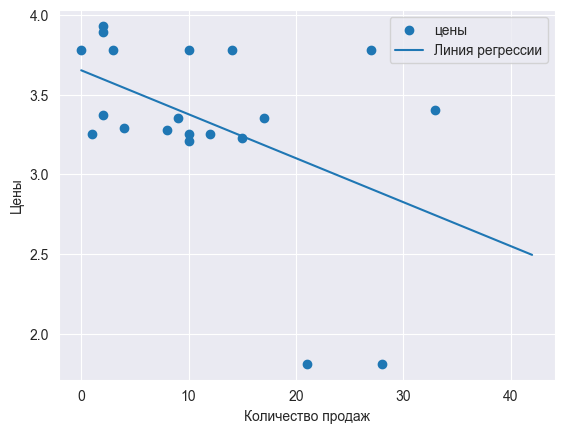

In [240]:
x_new = np.arange(0, df["amount"].max() + 10, 1)  # Используем максимальное значение из данных для x_new
plt.scatter(df["amount"], df["price"], label='цены')
plt.plot(x_new, linear_regression(x_new), label='Линия регрессии')
plt.ylim(top=df["price"].max()+0.1, bottom=df["price"].min()-0.1)
plt.xlabel('Количество продаж')
plt.ylabel('Цены')
plt.legend()
plt.show()


Также рассмотрим график в меньшем масштабе

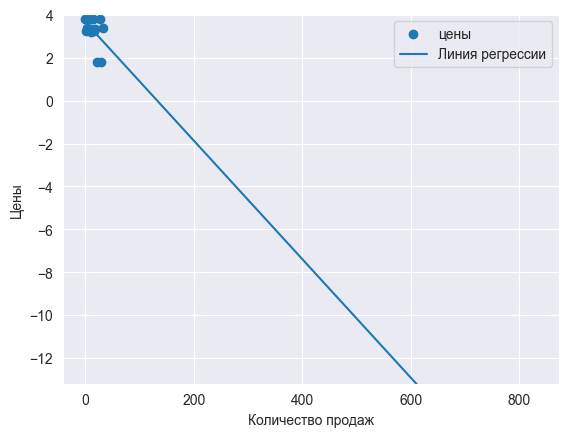

In [241]:
x_new = np.arange(0, df["amount"].max() + 800, 1)  # Используем максимальное значение из данных для x_new
plt.scatter(df["amount"], df["price"], label='цены')
plt.plot(x_new, linear_regression(x_new), label='Линия регрессии')
plt.ylim(top=df["price"].max()+0.1, bottom=df["price"].min()-15)
plt.xlabel('Количество продаж')
plt.ylabel('Цены')
plt.legend()
plt.show()

Несложно заметить что при уменьшении цены, увеличивается количество продаж
Скорее всего так и будет продолжаться до какого либо предела.
Также можно сделать вывод, что этот товар - нормальное благо.
Коэффициент $c_1$ показывает значение f(x) при x = 0. Как правило это значение не имеет экономического смысла. Из значения этого коэффициента можно сделать вывод, что при цене 3.65 за единицу, согласно модели, будут
отсутствовать продажи.
Коэффициент $c_2$ показывает, на сколько единиц в среднем изменится f(x), если x изменится на одну единицу. Из
рассмотренного примера можно сделать вывод, что уменьшение цены на 0.027586 единицы приводит к
увеличению объема продаж на 1 единицу продукции.

### Экспоненциальную модель
Теперь построю экспоненциальную модель регрессии для описания зависимости стоимости и объема продаж с использованием МНК
Буду искать модель для зависимости числа продаж от цены в виде функции
$f(x) = c_1 * e^{c_2*x}$
Для этого возьмe логарифм от обоих частей выражения
$ln f(x) = ln c_1 + c_2 * x$
Сделаю замену переменных $y = ln f(x) c_1^* = ln c_1$ и получу
$y = c_1^* + c_2*x$
В качестве базисных функций необходимо выбрать
$f_1(x) = 1  f_2(x) = x$

найдём десятичный логарифм от каждой цены

In [242]:
y = np.log(y)
y

0     0.593327
1     0.593327
2     1.329724
3     1.329724
4     1.329724
5     1.329724
6     1.329724
7     1.358409
9     1.187843
10    1.172482
12    1.208960
13    1.208960
15    1.223775
16    1.178655
17    1.178655
19    1.190888
Name: price, dtype: float64

Снова вычислим значение коэффициента по формуле
$c = ((A^T*A)^{-1}*A^T)*y$

In [243]:
c = (np.linalg.inv(A.T @ A) @ A.T) @ y
c

0    1.304563
1   -0.010437
dtype: float64

Запишем искомую функцию

In [244]:
print(f"y = {c[1]}*x + {c[0]}")

y = -0.010436804013249895*x + 1.3045631347145963


После обратного преобразования получаем

In [245]:
print(f"f(x) = {math.e**c[0]}*e^({c[1]}*x)")

f(x) = 3.6860784222054632*e^(-0.010436804013249895*x)


In [246]:
def exp_regression(x: int) -> float:
    return math.e**c[0]*math.e**(c[1]*x)

Модель регрессии позволяет прогнозировать неизвестное значение зависимой
переменной f(x) по известному значению независимой переменной x.

Построим диаграммы рассеяния и нанесем линии регрессии.

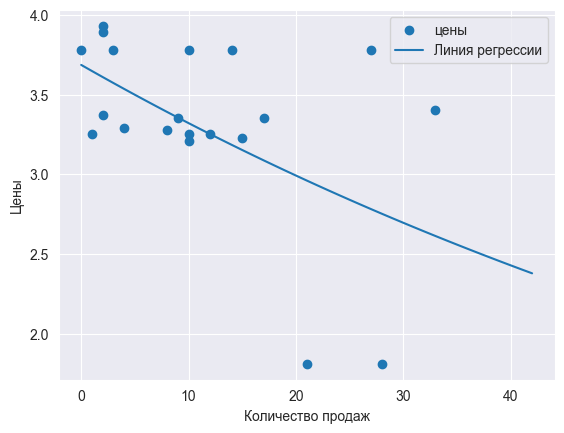

In [247]:
x_new = np.arange(0, df["amount"].max() + 10, 1)  # Используем максимальное значение из данных для x_new
plt.scatter(df["amount"], df["price"], label='цены')
plt.plot(x_new, exp_regression(x_new), label='Линия регрессии')
plt.ylim(top=df["price"].max()+0.1, bottom=df["price"].min()-0.1)
plt.xlabel('Количество продаж')
plt.ylabel('Цены')
plt.legend()
plt.show()


При такой регрессии можно сделать те же выводы, что и в предыдущей
Только теперь график также показывает, что постепенно влияние цены на количество продаж вырастает
(т. е. со временем при приближении к нулю количество продаж уйдет в бесконечность)
Разумеется, такого быть не может, и регрессионную модель навряд ли можно применить для
значений, сильно отличающихся от выборки
Заключил я это из того, что график постепенно стремиться к прямой $y = 0$
Это можно лучше увидеть на меньшем масштабе:

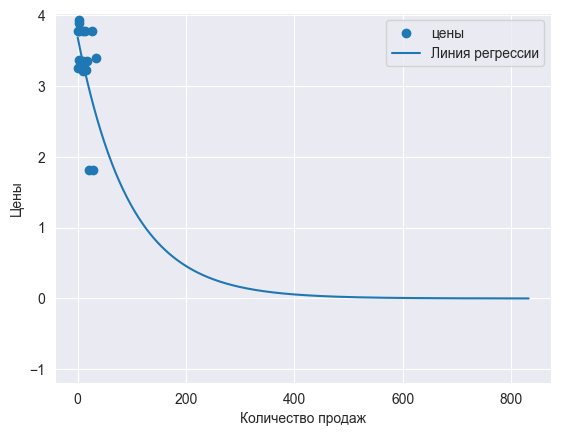

In [248]:
x_new = np.arange(0, df["amount"].max() + 800, 1)  # Используем максимальное значение из данных для x_new
plt.scatter(df["amount"], df["price"], label='цены')
plt.plot(x_new, exp_regression(x_new), label='Линия регрессии')
plt.ylim(top=df["price"].max()+0.1, bottom=df["price"].min()-3)
plt.xlabel('Количество продаж')
plt.ylabel('Цены')
plt.legend()
plt.show()
